<h1> Haberman Dataset Visualization and Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/aaic assignment/haberman dataset

/content/drive/MyDrive/aaic assignment/haberman dataset


In [3]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

haberman_data=pd.read_csv('haberman.csv')
haberman_data.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


<h2> Step1: Visualize the data

Reading the dataset

Q1) How many datapoints and features?

In [4]:
print(haberman_data.shape)

(306, 4)


Q2) What are the column names in the dataset?


In [5]:
print(haberman_data.columns)
haberman_data.info()

Index(['age', 'year', 'nodes', 'status'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Q3) How many datapoints for each class are present?

In [6]:
haberman_data['status'].value_counts()


1    225
2     81
Name: status, dtype: int64

<h5> Observation on reading_dataset: The haberman dataset is an unbalanced dataset having:

- 306 datapoints/values
- There are 3-input variable: age, year (year of operation), nodes
- There is one class variable: status (Survival) having: 1 (Survived) and 2(Not-survived)
- It consist of patients who survived 5 years or more
- There are no null values

<h1> Step2: Plotting the dataset

<h4> Bi-variate Analysis

a) 2D- scatter plot

Since our 2-major key-columns are: age, nodes because year (operation year) do not contribute to analysis much

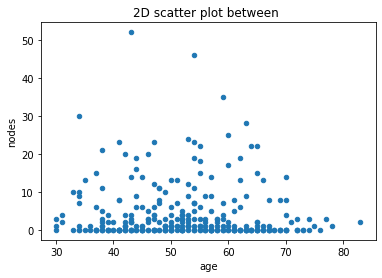

In [7]:
haberman_data.plot(kind='scatter',x='age',y='nodes')

plt.title("2D scatter plot between ")

plt.show()


<Figure size 432x288 with 0 Axes>

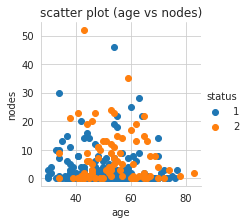

In [8]:
# using seaborn
import seaborn as sns
plt.figure()
sns.set_style("whitegrid")
g=sns.FacetGrid(haberman_data,hue="status")
g.map(plt.scatter,'age','nodes')
plt.title("scatter plot (age vs nodes)")
g.add_legend()

Pair-Plot

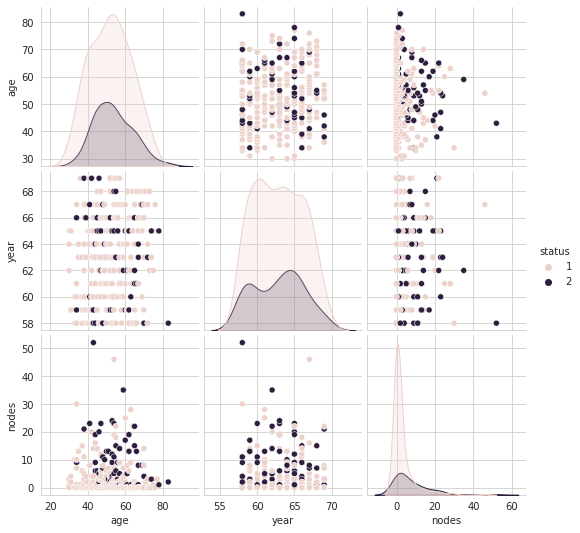

In [9]:
sns.pairplot(haberman_data, hue="status",vars=['age','year','nodes'])

<h5> Observations from the above plots:

- From above plots we cannot conclude something as the plots did not convey something useful other than that all datapoints are spread across the class_status.

<h4> Plotting the dataset: Univariate Analysis 

<h5> Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of feature: Age')

<Figure size 432x288 with 0 Axes>

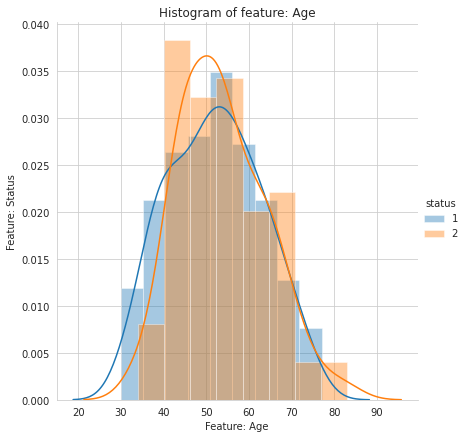

In [12]:
plt.figure()
g=sns.FacetGrid(haberman_data,hue="status",size=6)
g.map(sns.distplot, "age")
g.add_legend()
plt.xlabel("Feature: Age")
plt.ylabel("Feature: Status")
plt.title("Histogram of feature: Age")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

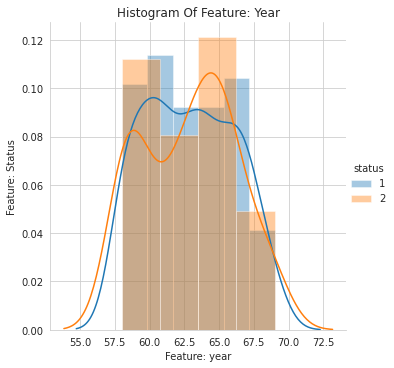

In [13]:
plt.figure()
g=sns.FacetGrid(haberman_data,hue="status",size=5)
g.map(sns.distplot,"year")
plt.title("Histogram Of Feature: Year")
plt.xlabel("Feature: year")
plt.ylabel("Feature: Status")
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

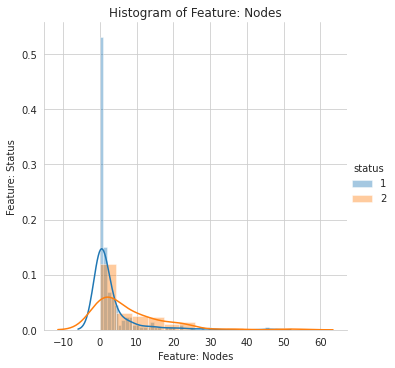

In [14]:
plt.figure()
g=sns.FacetGrid(haberman_data,hue="status",size=5)
g.map(sns.distplot, 'nodes')
plt.title("Histogram of Feature: Nodes")
plt.xlabel("Feature: Nodes")
plt.ylabel("Feature: Status")
g.add_legend()

<h5> Observation from Univariate Analysis:

- Analysis through Univariate features is not good.

- Feature 'age' and 'year' are not good for classification as they highly overlap between class label

- Feature 'nodes' is more relevant as there is less overlapping between the class labels.

<h1> PDF and CDF of the dataset

In [16]:
haberman_data_1=haberman_data.loc[haberman_data['status']==1]
haberman_data_2=haberman_data.loc[haberman_data['status']==2]

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618] [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
bin edges [ 4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
 
PDF
 
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
 
CDF
 
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


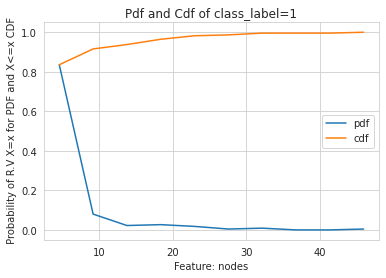

In [19]:
count,edges=np.histogram(haberman_data_1['nodes'],bins=10,density=True)
print(count,edges)
pdf=count/sum(count)
cdf=np.cumsum(pdf) #Cumsum= Cumulative Sum of the values
print("bin edges",edges[1:])
print(" ")
print("PDF")
print(" ")
print(pdf)
print(" ")
print("CDF")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf,label="pdf")
plt.plot(edges[1:],cdf,label="cdf")
plt.xlabel("Feature: nodes")
plt.ylabel(" Probability of R.V X=x for PDF and X<=x CDF")
plt.title("Pdf and Cdf of class_label=1")
plt.legend()

From PDF and CDF plot of status_label=1 we can see:

- 93% of the patients who survived have positive node between 0-10
- 4% patients who survived have node more than 15 

bin edges [ 5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
 
pDF
 
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
 
CDF
 
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


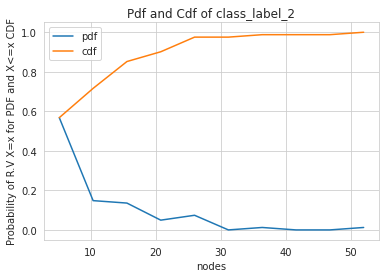

In [18]:
count,edges=np.histogram(haberman_data_2['nodes'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("pDF")
print(" ")
print(pdf)
print(" ")
print("CDF")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf,label="pdf")
plt.plot(edges[1:],cdf,label="cdf")
plt.xlabel("nodes")
plt.ylabel("Probability of R.V X=x for PDF and X<=x CDF")
plt.title("Pdf and Cdf of class_label_2")
plt.legend()

Observation from PDF and CDF plot of status_label=2:

- 72% patients who not survived had nodes between 0-10
- Substantial number of patients had nodes greater than 15

<h1> BOX-Plot

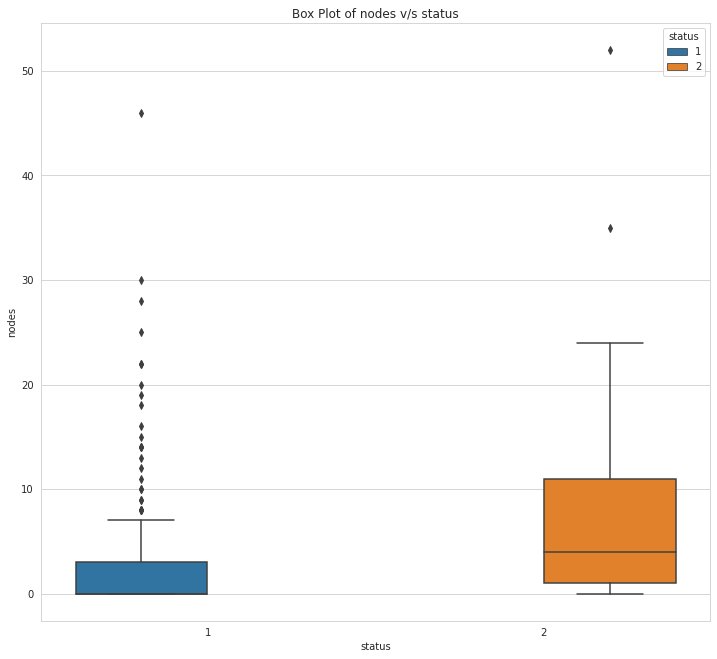

In [21]:
plt.figure(figsize=(12,11))
plt.title("Box Plot of nodes v/s status")
sns.boxplot(data=haberman_data,x='status',y='nodes',hue='status')

Observation:

- About 50% of patients who survived (status=1) have no positive nodes
- Even if there is a positive node, some patient survived

<h1> Violin Plot

Text(0.5, 1.0, 'Violin Plot of nodes v/s status')

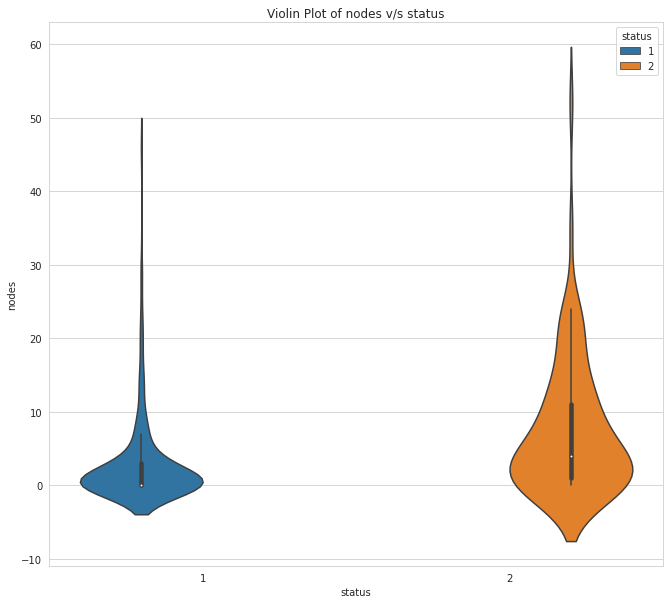

In [29]:
plt.figure(figsize=(11,10))
sns.violinplot(data=haberman_data,x='status',y= 'nodes', hue='status')
plt.title("Violin Plot of nodes v/s status")

Observation:

- Denser bottom at Status-1 indicated patients have lesser number of nodes

- Less dense bottom at Status-2 indicates patients have more number of nodes

<h1>Step3: Statistical Calculation

- Mean, Median, Std-Deviation, Percentiles and Quantiles and MAD

In [23]:
from statsmodels import robust

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
print(" For Status-1: \n")
print(" Mean: ", np.mean(haberman_data_1['nodes']))
print(" Std-Deviation: ", np.std(haberman_data_1['nodes']))
print(" Median: ", np.median(haberman_data_1['nodes']))
print(" 90th Percentile: ",np.percentile(haberman_data_1['nodes'],90))
print(" Quantiles [25th, 50th, 75th]: ", np.percentile(haberman_data_1['nodes'],np.arange(25,100,25)))
print(" Mean Absolute Deviation: ", robust.mad(haberman_data_1['nodes']))

print("\n")

print(" For Status-2: \n")
print(" Mean: ", np.mean(haberman_data_2['nodes']))
print(" Std-Deviation: ", np.std(haberman_data_2['nodes']))
print(" Median: ", np.median(haberman_data_2['nodes']))
print(" 90th Percentile: ",np.percentile(haberman_data_2['nodes'],90))
print(" Quantiles [25th, 50th, 75th]: ", np.percentile(haberman_data_2['nodes'],np.arange(25,100,25)))
print(" Mean Absolute Deviation: ", robust.mad(haberman_data_2['nodes']))

 For Status-1: 

 Mean:  2.7911111111111113
 Std-Deviation:  5.857258449412131
 Median:  0.0
 90th Percentile:  8.0
 Quantiles [25th, 50th, 75th]:  [0. 0. 3.]
 Mean Absolute Deviation:  0.0


 For Status-2: 

 Mean:  7.45679012345679
 Std-Deviation:  9.128776076761632
 Median:  4.0
 90th Percentile:  20.0
 Quantiles [25th, 50th, 75th]:  [ 1.  4. 11.]
 Mean Absolute Deviation:  5.930408874022408


From above calculation, the observations are:

- patients who survives had lesser nodes_average
- 90% who survived had nodes<=8 and 90% patients who didnt survived had nodes<=20
- Status-1 had less spread on nodes whereas Status-2 has more spread.

In [25]:
haberman_data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observation:

Average nodes of patients who survived is less than average of the nodes in whole dataset. Hence, patients who died had the large number of nodes.

In [26]:
data_0=haberman_data.loc[haberman_data['nodes']<=0]
data_0.shape

(136, 4)

<h1> Count Plot

Text(0.5, 1.0, 'count plot of patients having 0 node')

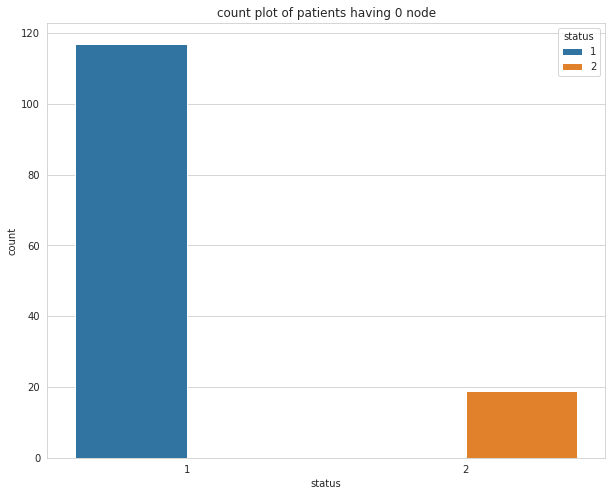

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x="status",data=data_0,hue="status")
plt.title("count plot of patients having 0 node")

Observation:

- 136 points/patients have 0 nodes

- survival rate of patients having 0 nodes is large

<h3> Conclusion:

<h3> From Dataset:

- haberman dataset is an inbalanced dataset
- Columns/Features 'age' and 'year' are not good for classification and analysis
- Feature= 'nodes' is relevant for classification.
- Majority of patients who survived had lesser number of nodes or positive nodes=0
- More features are required for a clear classification and analysis on the data.

<h3> From Histograms:

- Feature 'age' and 'year' are not good as there is highly overlapping between class labels.
- Feature 'nodes' is more relevant as there is less overlap between class labels.

<h4> From Pair-Plot:

- 'Age' and "Year" do not help in analysis as their PDF's are overlapping too much.
- Feature "nodes" is better but not great.
- The scatter plot between "age" and "nodes" seems to classify the class_labels not perfectly but will work.

<h4> From Box-Plot:

- From the box-plot it is clear that feature: "Nodes" provides a better classification as its IQR do not coincide.
- There are load of outlier in "Nodes" boxplot and hence we can conclude that there are many patients who survived even though there is a presence of large number of nodes.
- Hence, Calculating "Probability of Survival" is much better method as there is randomness in the system.

<h4> From CDF and PDF:

- Patients who have "nodes"<=5 have highest survival chance of 85%.
- Patients who have nodes>40 have survival rate of 0.
- Therefore, as number of nodes increases, probability of survival decreases drastically.
- There is also a chance that patients with nodes < 5 have 58% chance that they will not survive longer.

<h4> From Violin Plot:

- The spread of survival rate is ranges from 0-10 and Maximum_Intensity is around 4. Hence, survival rate is much higher when nodes<=4

<h4> From Count Plot:

- 136 patients have 0 nodes in whole data corpus.
- Survival rate of patients having 0 nodes is large.

<h4> From Statistical Calculation:

- Mean of survived patient is (2.7) or around 3 and that of not_survived patient is around 8.
- From std. deviation, it is evident that spread of survived_patients is less that spread of not_survived patients.
- From Median, it is clear that most of the survived patients have nodes=0 and not_survived patients have nodes>4
- Nearly 75% of population of survived patients have the nodes<=3, whereas 50% of the population has nodes=0.
- Nearly 50% of population of not_survived patients have the nodes<=4, whereas 75% of the population has nodes<=11.


In [31]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('EDA on Haberman Dataset.ipynb')

--2022-05-09 04:21:16--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0.001s  

2022-05-09 04:21:16 (2.45 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/EDA on Haberman Dataset.ipynb to pdf
[NbConvertApp] Support files will be in EDA on Haberman Dataset_files/
[NbConvertApp] Making directory ./EDA on Haberman Dataset_files
[NbConvertApp] Making directory ./EDA on Haberman Dataset_files
[NbConvertApp] Making directory ./EDA on Haberman Dataset_files
[NbCon

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'